<a href="https://colab.research.google.com/github/arumm25/project4_MesinLearning/blob/main/ProjectUAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: sambungkan ke drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2025-07-06 07:16:35.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:35.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:35.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:35.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:35.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:35.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:35.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 07:16:36.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

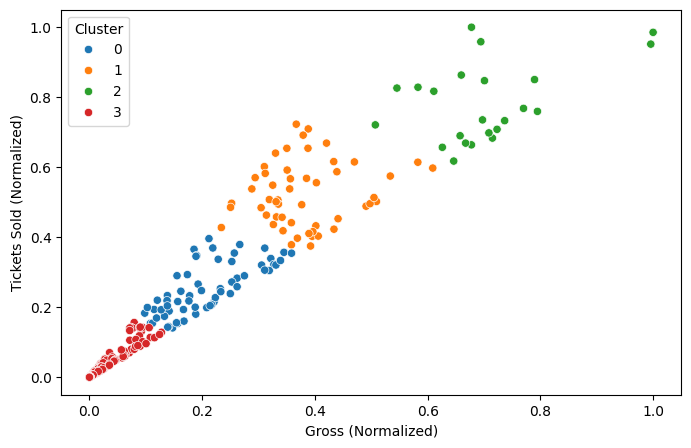

In [ ]:
# app.py

import pandas as pd
import streamlit as st
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Film Genre Clustering", layout="centered")

st.title("🎬 Film Genre Clustering App")
st.markdown("""
Aplikasi ini mengelompokkan genre film berdasarkan statistik penonton dan pendapatan.
Data: Gross, Tickets Sold, dan Inflasi Disesuaikan.
""")

# Load dataset
data = pd.read_csv("ThrowbackDataThursday Week 11 - Film Genre Stats.csv")

# Label Encoding
label_encoder = LabelEncoder()
data['Genre_Encoded'] = label_encoder.fit_transform(data['Genre'])

# Normalisasi
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Fitur untuk clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Sidebar filter
st.sidebar.header("🔍 Filter")
selected_genre = st.sidebar.selectbox("Pilih Genre", ["All"] + sorted(data['Genre'].unique()))
selected_year = st.sidebar.selectbox("Pilih Tahun", ["All"] + sorted(data['Year'].unique()))

# Apply filters
filtered = data.copy()
if selected_genre != "All":
    filtered = filtered[filtered['Genre'] == selected_genre]
if selected_year != "All":
    filtered = filtered[filtered['Year'] == selected_year]

# Visualisasi scatter
st.subheader("📊 Visualisasi Clustering")
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=filtered, x='Gross_Norm', y='Tickets_Norm', hue='Cluster', palette='tab10', ax=ax)
plt.xlabel("Gross (Normalized)")
plt.ylabel("Tickets Sold (Normalized)")
st.pyplot(fig)

# Tampilkan data cluster
st.subheader("📋 Data per Cluster")
st.dataframe(filtered[['Year', 'Genre', 'Gross', 'Tickets Sold', 'Inflation-Adjusted Gross', 'Cluster']])


In [ ]:
!pip install streamlit

In [11]:
import pandas as pd

# Load dataset kamu
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Tampilkan 5 baris pertama sebagai tabel
data.head()


,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset film
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi kolom numerik yang relevan
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Tampilkan kolom hasil normalisasi
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']].head()


,Gross_Norm,Tickets_Norm,Inflasi_Norm
0,0.185497,0.365548,0.365548
1,0.310278,0.601763,0.601763
2,0.212039,0.396005,0.396005
3,0.388173,0.709496,0.709496
4,0.387684,0.654201,0.654201


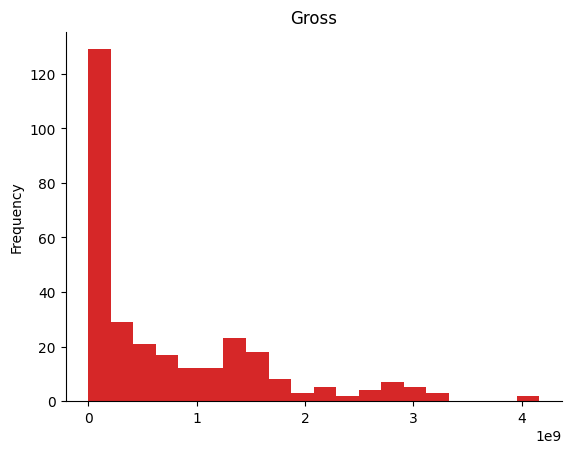

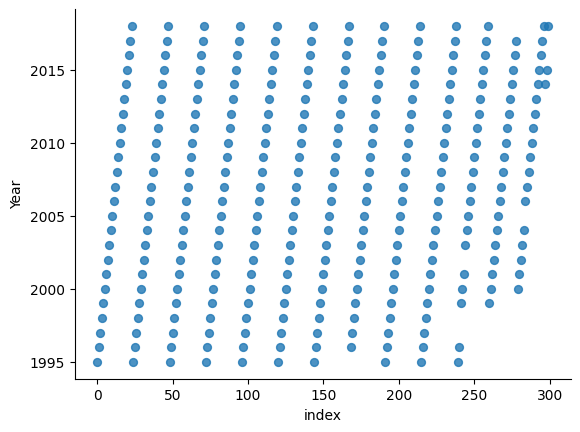

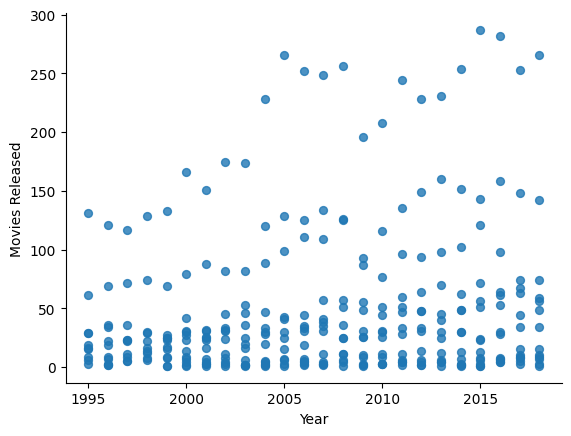

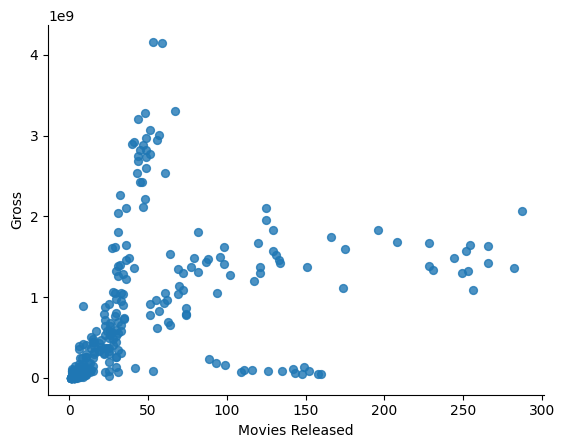

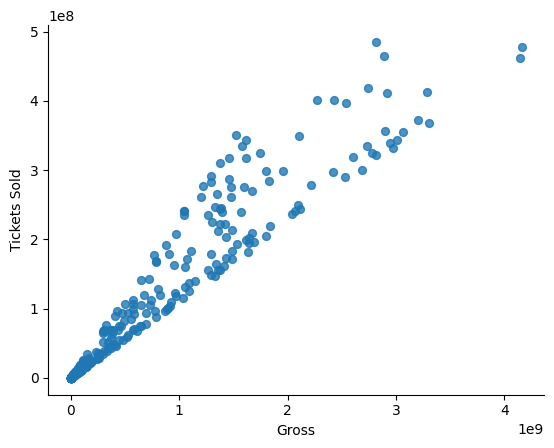

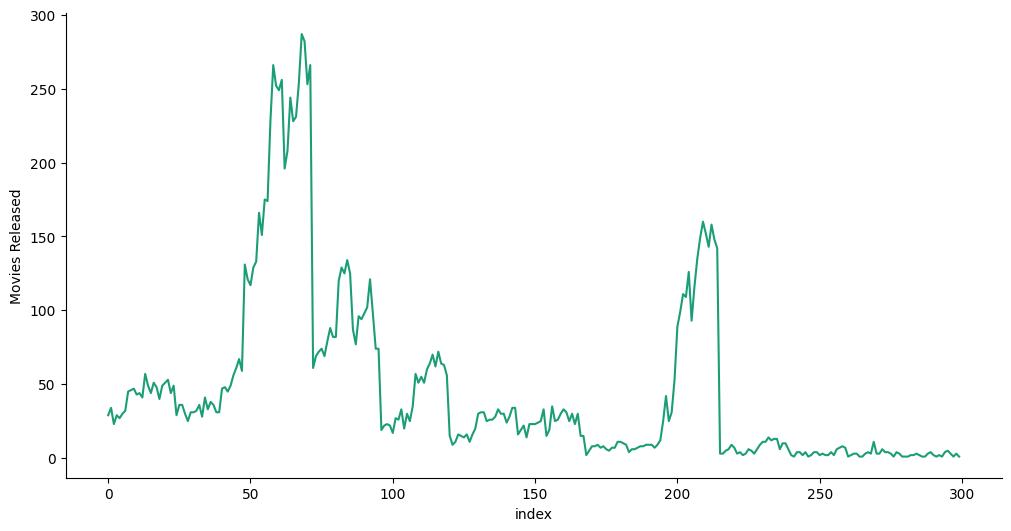

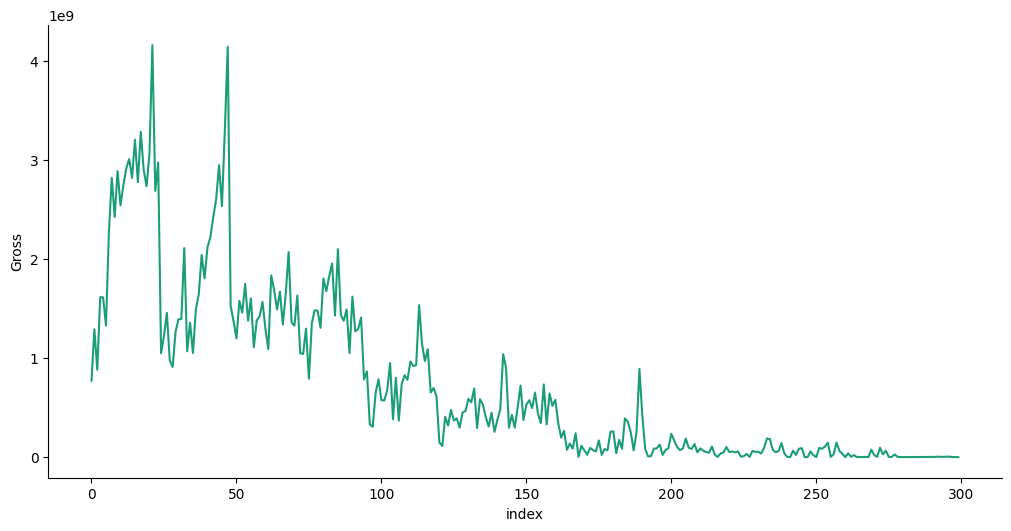

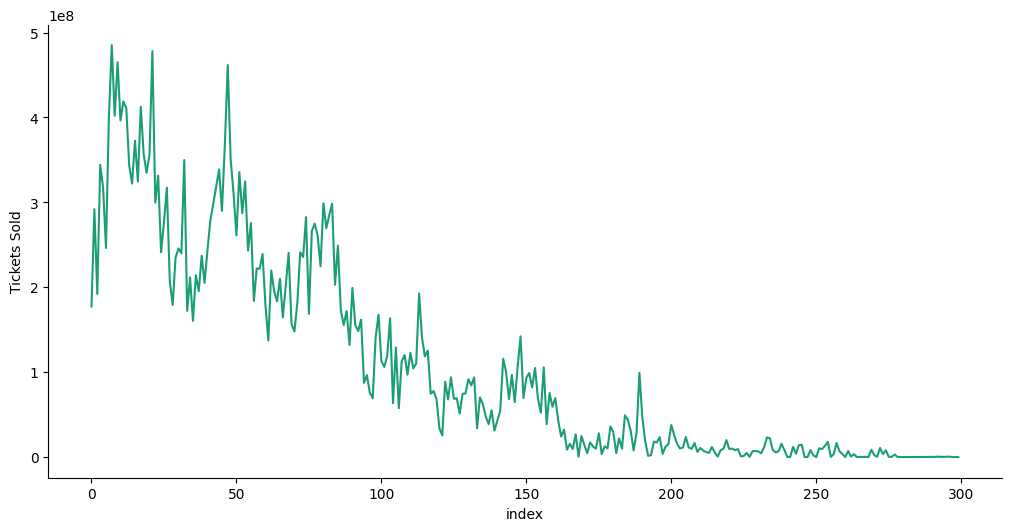

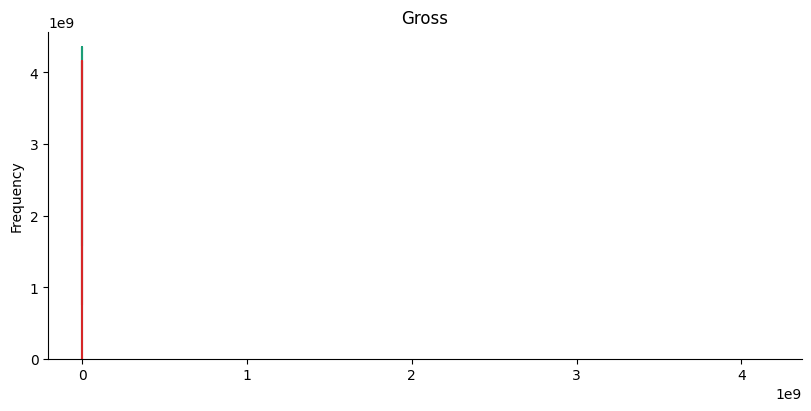

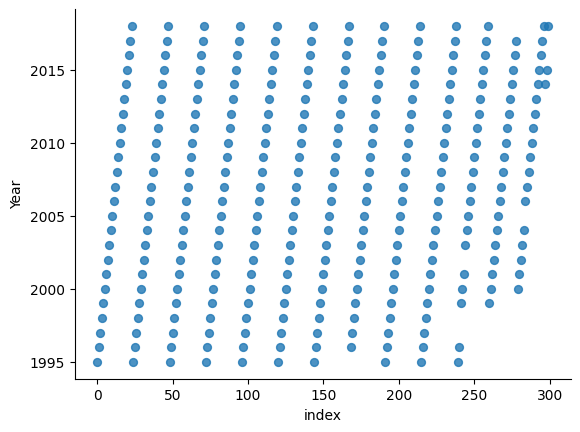

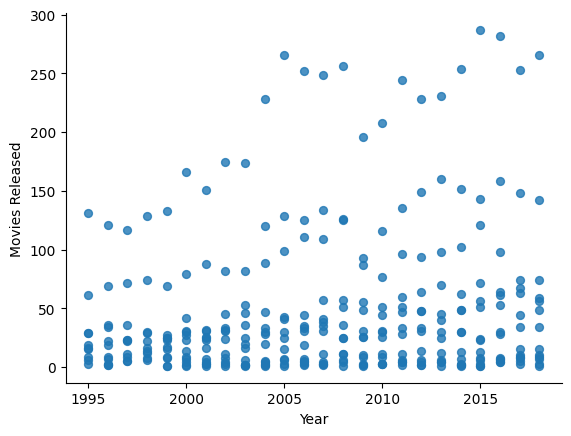

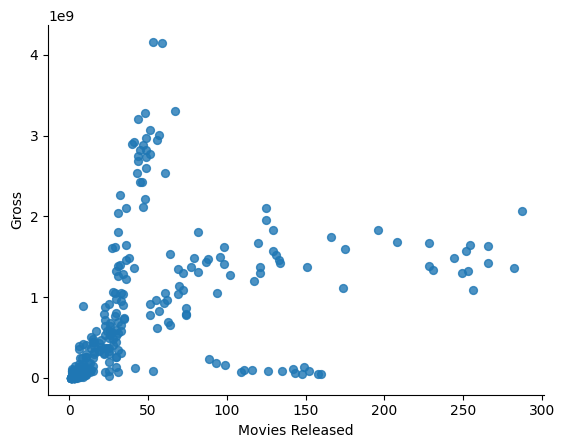

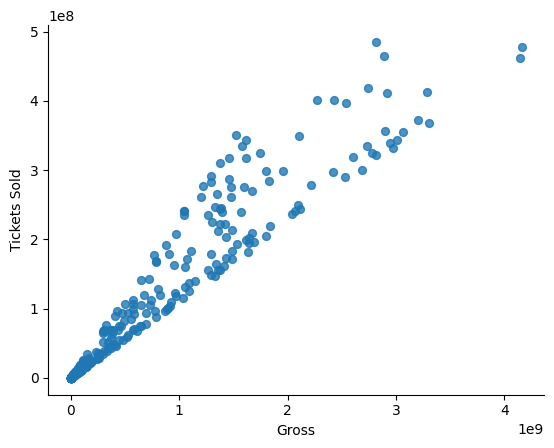

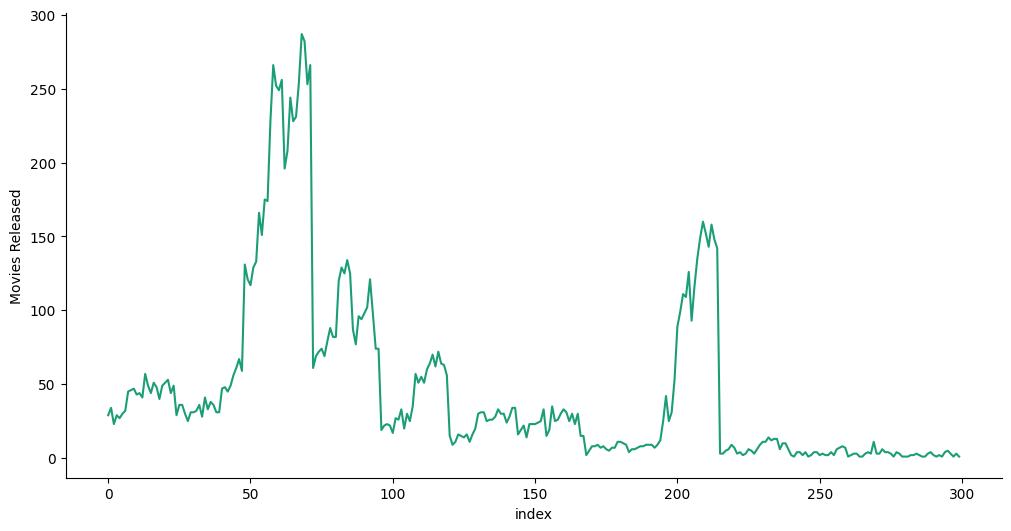

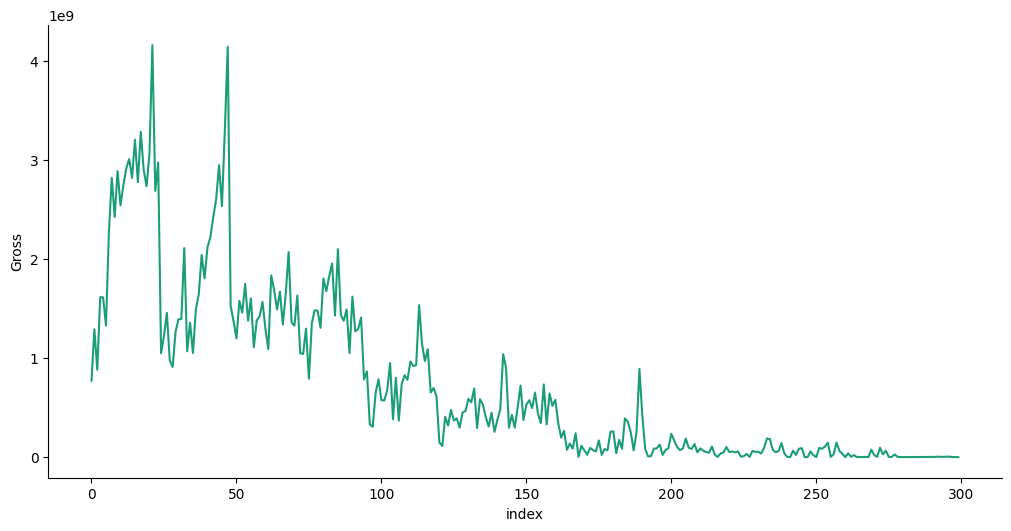

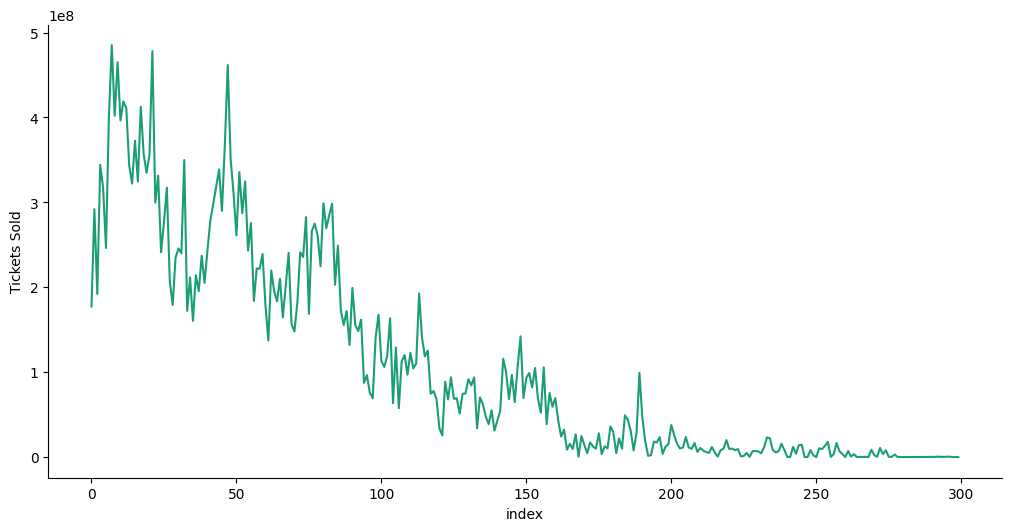

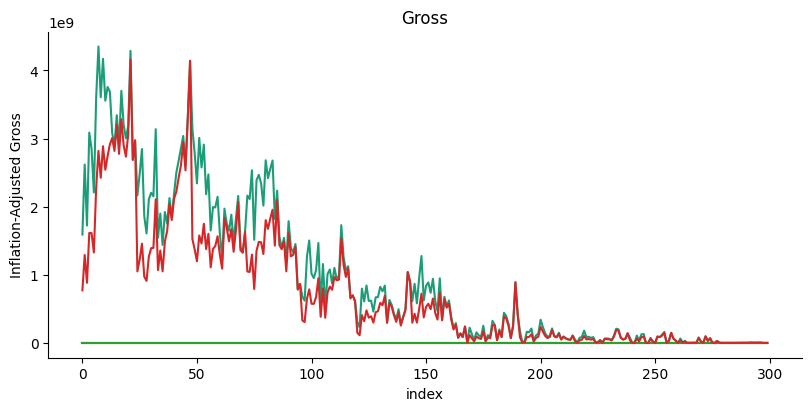

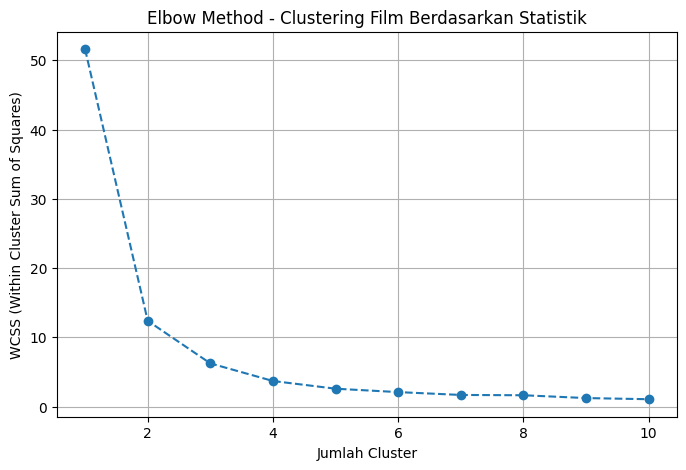

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Normalisasi fitur numerik
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Siapkan fitur untuk clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# Hitung WCSS untuk berbagai jumlah cluster (1 sampai 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Buat grafik Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Clustering Film Berdasarkan Statistik')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.grid(True)
plt.show()


In [16]:
from sklearn.cluster import KMeans

# Gunakan jumlah cluster optimal dari grafik Elbow (misal: 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Ambil nilai centroid
centroids = kmeans.cluster_centers_

# Tampilkan hasil centroid
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Gross_Norm={centroid[0]:.4f}, Tickets_Norm={centroid[1]:.4f}, Inflasi_Norm={centroid[2]:.4f}")


Centroid 1: Gross_Norm=0.2058, Tickets_Norm=0.2527, Inflasi_Norm=0.2527
Centroid 2: Gross_Norm=0.3785, Tickets_Norm=0.5221, Inflasi_Norm=0.5221
Centroid 3: Gross_Norm=0.7037, Tickets_Norm=0.7840, Inflasi_Norm=0.7840
Centroid 4: Gross_Norm=0.0273, Tickets_Norm=0.0343, Inflasi_Norm=0.0343


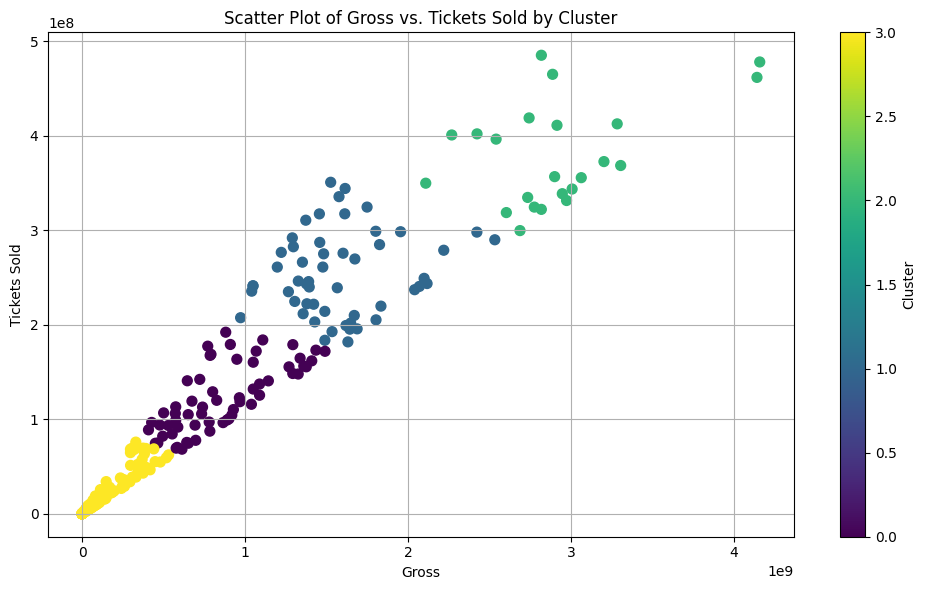

In [17]:
import matplotlib.pyplot as plt

# Scatter plot hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(
    data['Gross'],                      # sumbu X: Gross asli (bukan normalized)
    data['Tickets Sold'],               # sumbu Y: Tickets Sold asli
    c=data['Cluster'],                  # Warna berdasarkan cluster hasil KMeans
    cmap='viridis', s=50
)

plt.title('Scatter Plot of Gross vs. Tickets Sold by Cluster')
plt.xlabel('Gross')
plt.ylabel('Tickets Sold')
plt.colorbar(label='Cluster')  # Menampilkan keterangan warna
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
plt.scatter(data['Gross_Norm'], data['Tickets_Norm'], c=data['Cluster'], cmap='viridis', s=50)


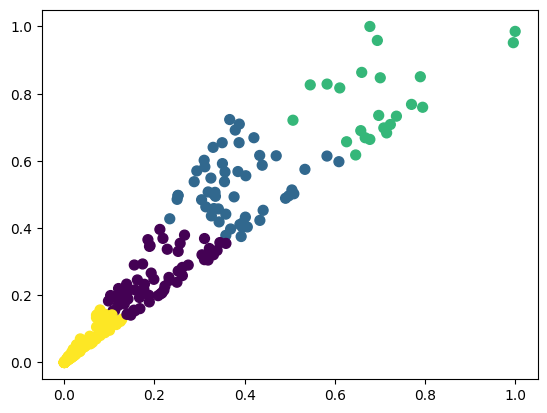

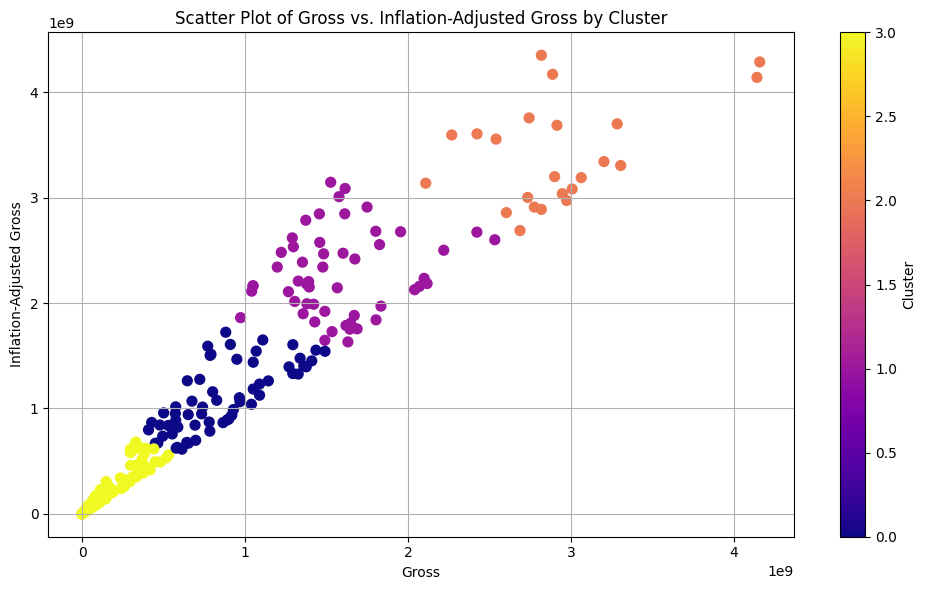

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(
    data['Gross'],
    data['Inflation-Adjusted Gross'],
    c=data['Cluster'], cmap='plasma', s=50
)
plt.title('Scatter Plot of Gross vs. Inflation-Adjusted Gross by Cluster')
plt.xlabel('Gross')
plt.ylabel('Inflation-Adjusted Gross')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


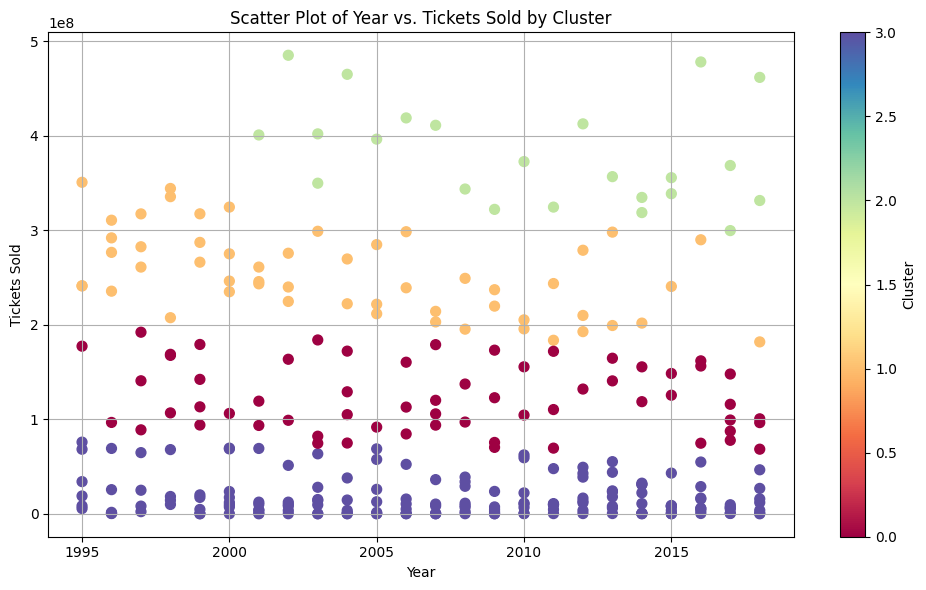

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(
    data['Year'],
    data['Tickets Sold'],
    c=data['Cluster'], cmap='Spectral', s=50
)
plt.title('Scatter Plot of Year vs. Tickets Sold by Cluster')
plt.xlabel('Year')
plt.ylabel('Tickets Sold')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import silhouette_score

# Hitung silhouette score
silhouette_avg = silhouette_score(features, data['Cluster'])

print(f"Rata-rata Silhouette Score dari clustering adalah: {silhouette_avg:.4f}")


Rata-rata Silhouette Score dari clustering adalah: 0.6329


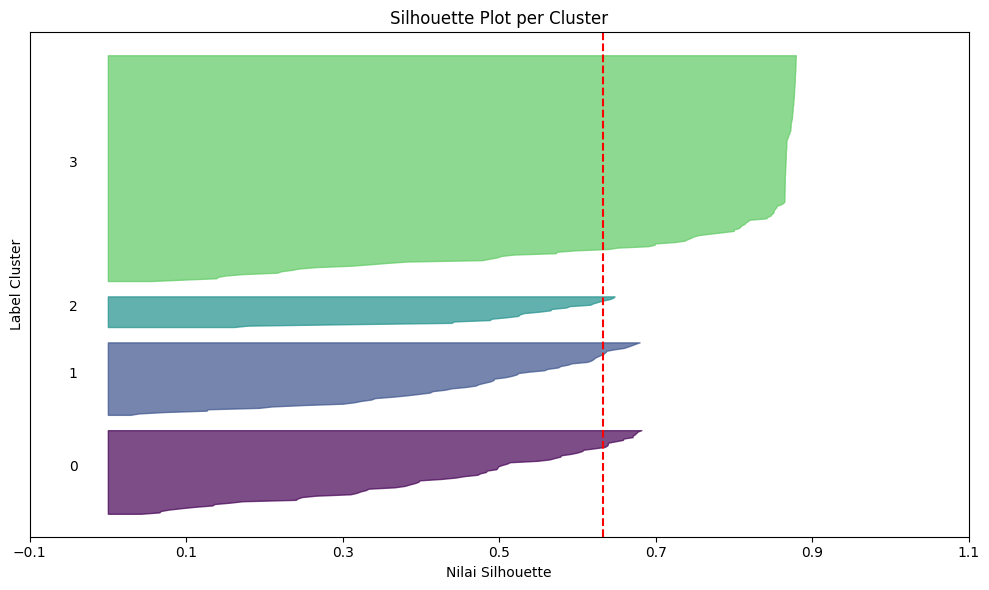

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Load dataset
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Normalisasi fitur numerik
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]
optimal_clusters = 4  # Ubah sesuai hasil Elbow Method jika perlu
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Hitung silhouette score per sample
sample_silhouette_values = silhouette_samples(features, data['Cluster'])

# Plot Silhouette
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[data['Cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / optimal_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Jarak antar cluster

# Tambahkan garis rata-rata
silhouette_avg = silhouette_score(features, data['Cluster'])
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Format plot
ax.set_title("Silhouette Plot per Cluster")
ax.set_xlabel("Nilai Silhouette")
ax.set_ylabel("Label Cluster")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.tight_layout()
plt.show()


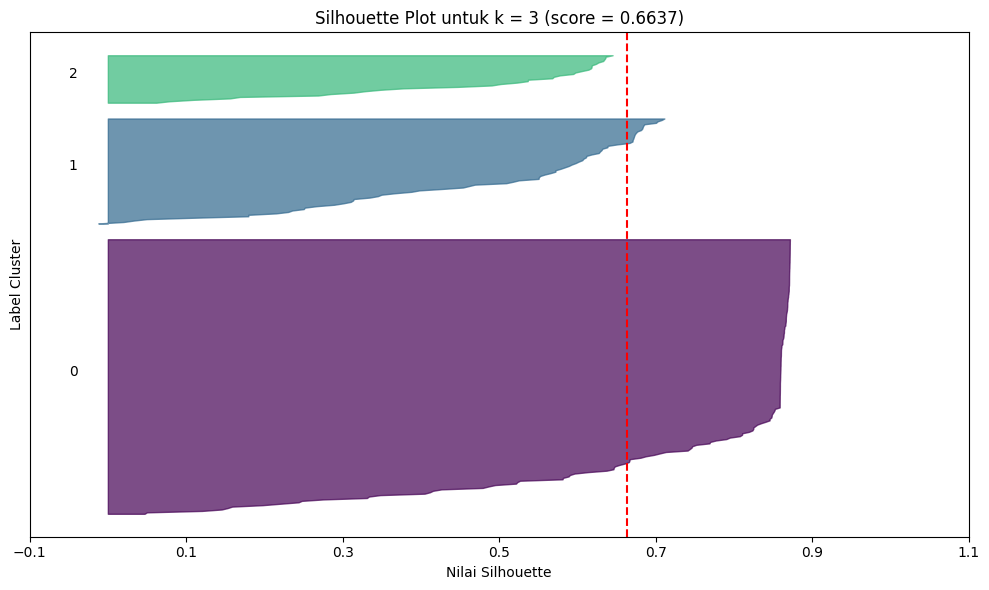

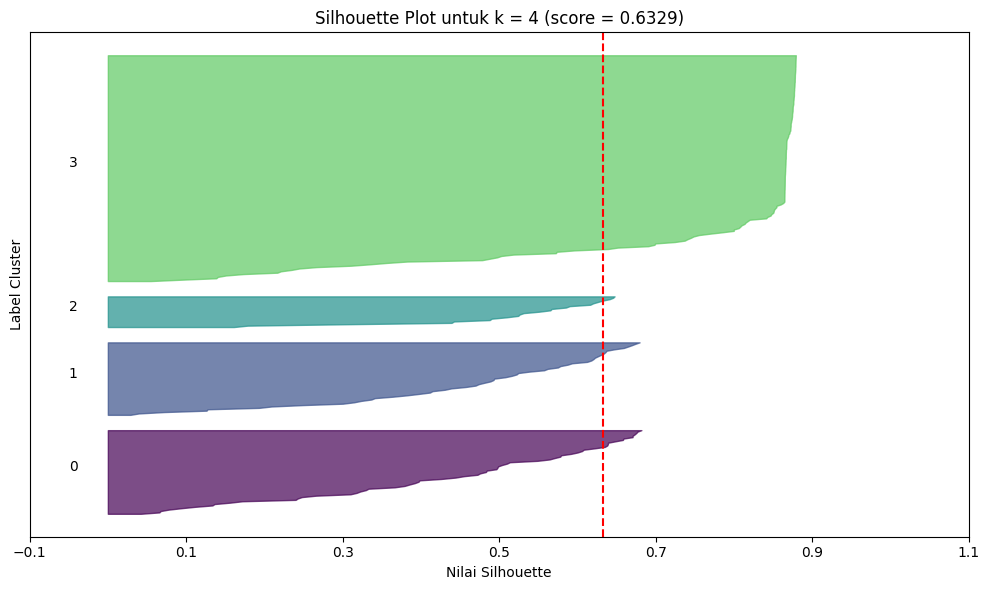

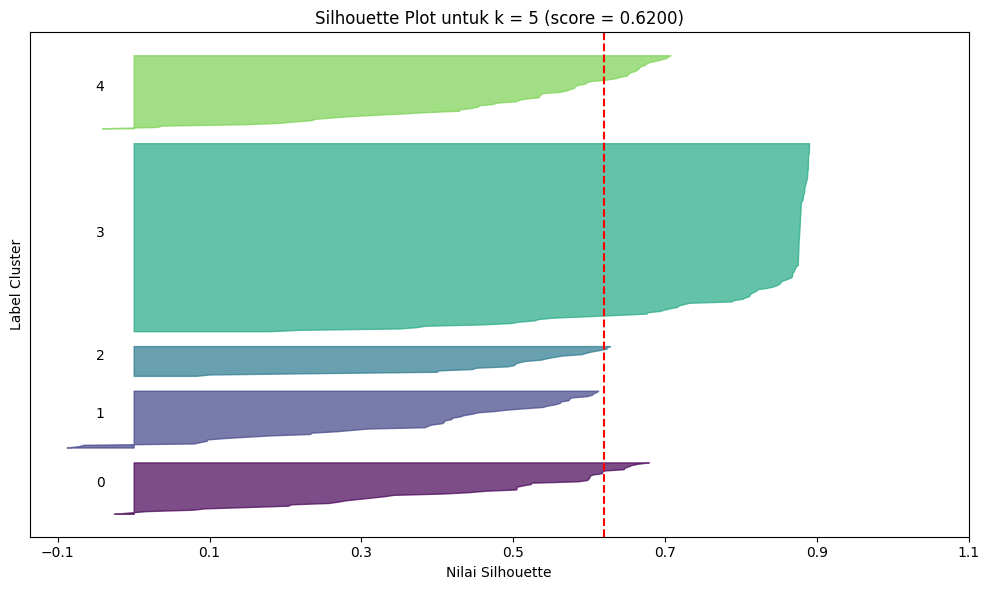

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Load dataset
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Normalisasi fitur
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Fitur untuk clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# Loop untuk membandingkan k=3, 4, 5
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f"Silhouette Plot untuk k = {k} (score = {silhouette_avg:.4f})")
    ax.set_xlabel("Nilai Silhouette")
    ax.set_ylabel("Label Cluster")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
    plt.tight_layout()
    plt.show()


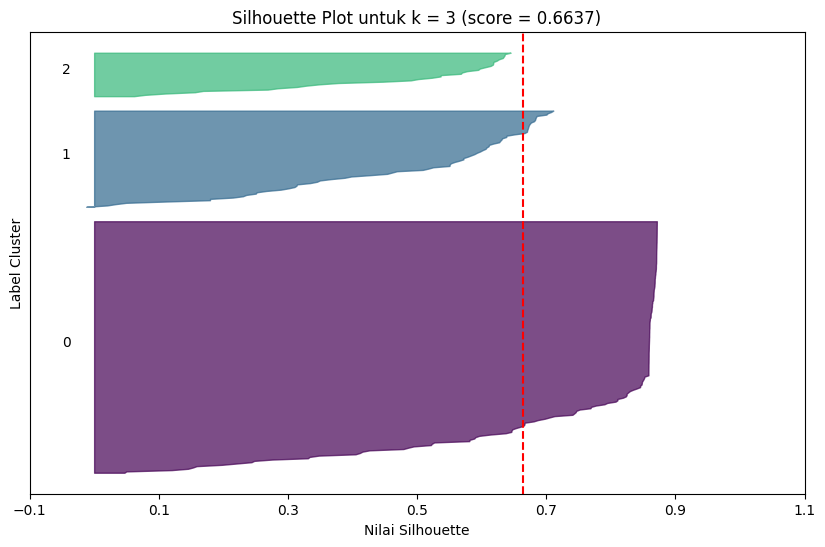

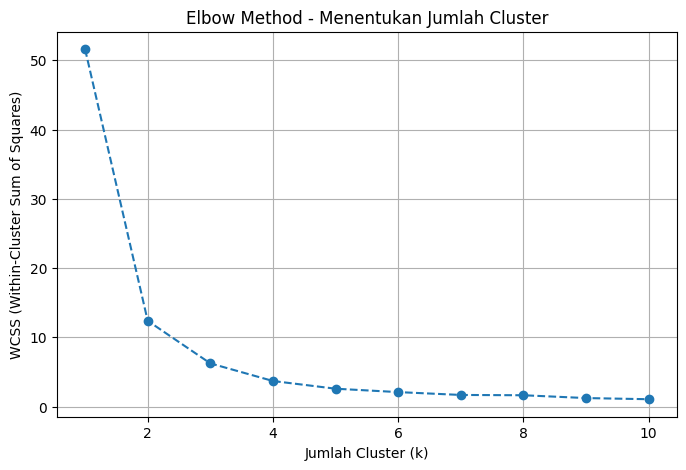

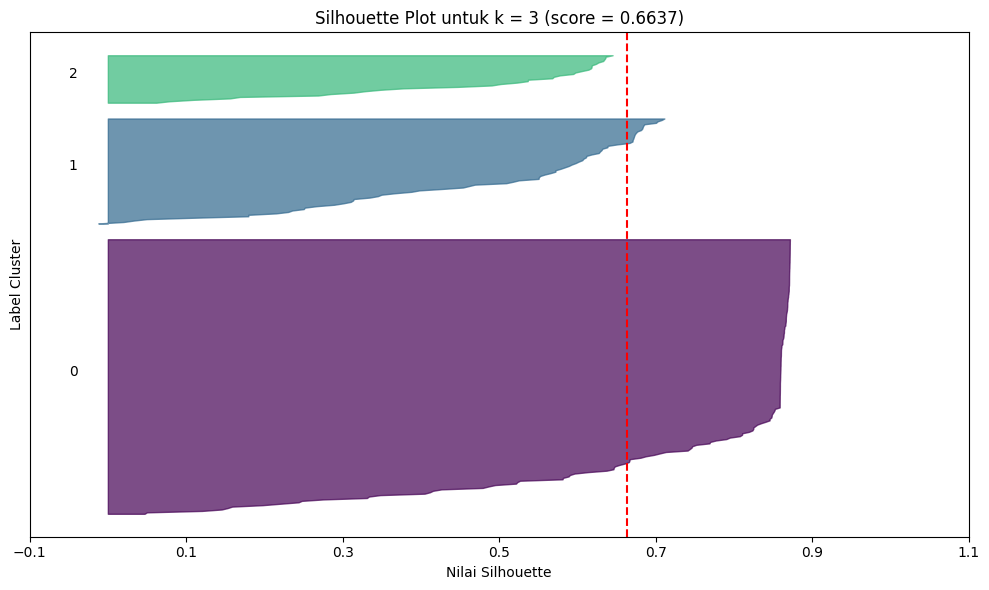

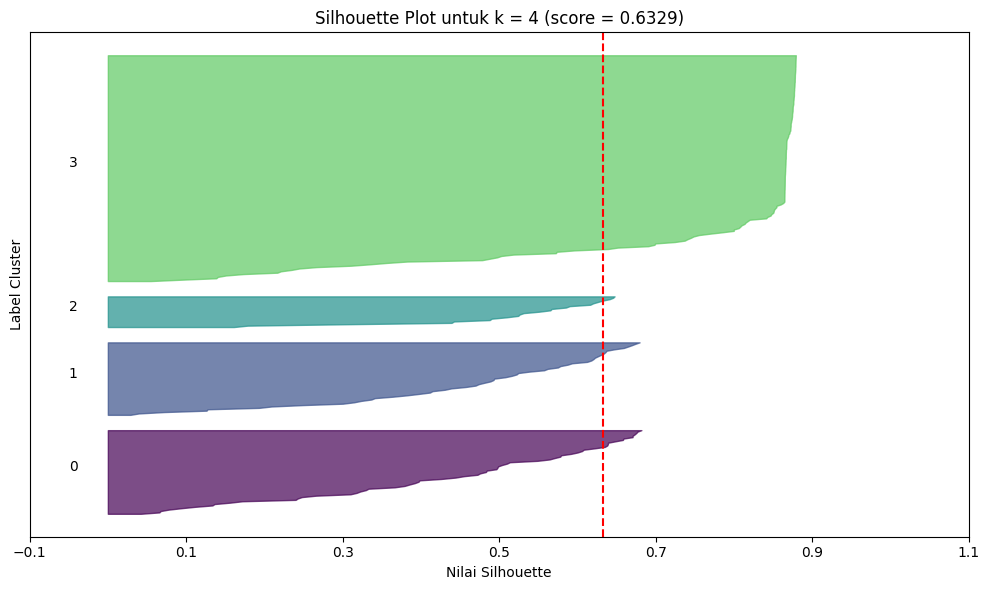

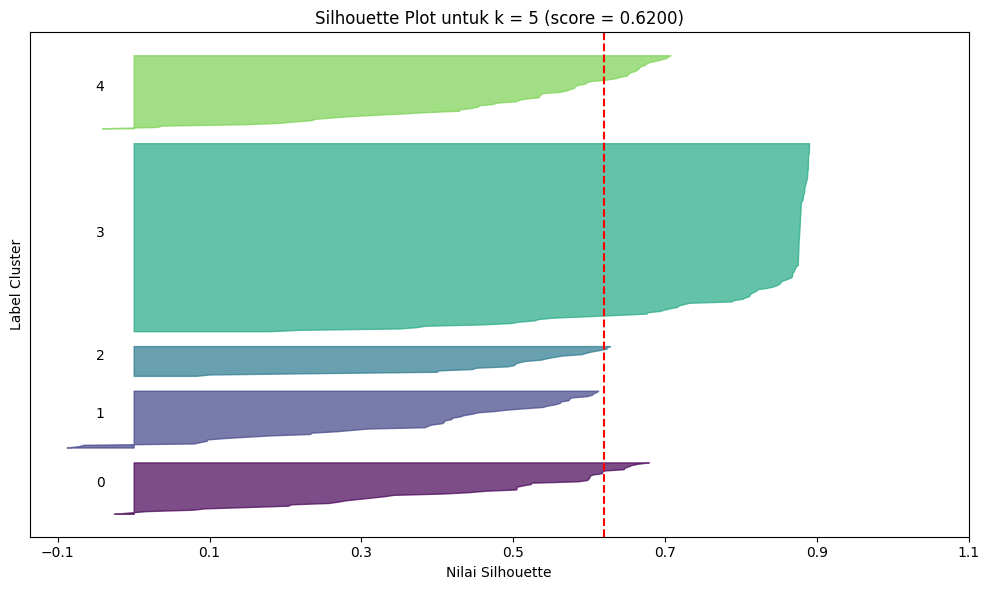

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Load dataset
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Normalisasi fitur numerik
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Fitur numerik untuk clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# =========================
# ✳️ ELBOW METHOD
# =========================
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# =========================
# ✳️ SILHOUETTE PLOTS
# =========================
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f"Silhouette Plot untuk k = {k} (score = {silhouette_avg:.4f})")
    ax.set_xlabel("Nilai Silhouette")
    ax.set_ylabel("Label Cluster")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
    plt.tight_layout()
    plt.show()

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans # Import KMeans

# Assuming 'features' DataFrame is already defined and normalized in previous cells.
# If not, you might need to include the data loading and normalization steps here.

# Perform KMeans clustering and assign cluster labels to the DataFrame
optimal_clusters = 4 # Use the optimal number of clusters found from Elbow/Silhouette plots
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)


# Hitung Silhouette Score berdasarkan hasil clustering
sil_score = silhouette_score(features, data['Cluster'])

# Tampilkan hasilnya
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.63


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Normalisasi fitur numerik
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Fitur untuk clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# Split train/test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_features = train_data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]
test_features = test_data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# Clustering (train)
optimal_clusters = 4  # Ganti kalau hasil Elbow beda
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(train_features)

# Prediksi cluster di test set
test_data['Cluster'] = kmeans.predict(test_features)

# Silhouette Score untuk train dan test
sil_train = silhouette_score(train_features, train_data['Cluster'])
sil_test = silhouette_score(test_features, test_data['Cluster'])

print(f"Silhouette Score (Train): {sil_train:.4f}")
print(f"Silhouette Score (Test): {sil_test:.4f}")


Silhouette Score (Train): 0.6269
Silhouette Score (Test): 0.6638


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('ThrowbackDataThursday Week 11 - Film Genre Stats.csv')

# Normalisasi fitur numerik
scaler = MinMaxScaler()
data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']] = scaler.fit_transform(
    data[['Gross', 'Tickets Sold', 'Inflation-Adjusted Gross']]
)

# Ambil fitur untuk clustering
features = data[['Gross_Norm', 'Tickets_Norm', 'Inflasi_Norm']]

# Buat label clustering sebagai pseudo-label
kmeans_full = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans_full.fit_predict(features)

# Split data & label pseudo-cluster
X_train, X_test, y_train, y_test = train_test_split(features, data['Cluster'], test_size=0.2, random_state=42)

# Latih KMeans lagi di training set
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

# Prediksi hasil cluster
y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

# Hitung akurasi terhadap pseudo-label (bukan ground truth)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Tampilkan hasilnya
print(f"Training Accuracy (vs. pseudo-label): {train_accuracy:.4f}")
print(f"Testing Accuracy (vs. pseudo-label): {test_accuracy:.4f}")


Training Accuracy (vs. pseudo-label): 0.0000
Testing Accuracy (vs. pseudo-label): 0.0000


In [30]:
from scipy.stats import mode
import numpy as np

# Buat fungsi untuk mencocokkan label klaster
def map_cluster_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)
        true_label = mode(y_true[mask], keepdims=True)[0][0]
        labels[mask] = true_label
    return labels

# Mapping prediksi ke label acuan
y_test_pred_mapped = map_cluster_labels(y_test, y_test_pred)

# Evaluasi akurasi setelah mapping
adjusted_accuracy = accuracy_score(y_test, y_test_pred_mapped)
print(f"Adjusted Accuracy: {adjusted_accuracy:.4f}")


Adjusted Accuracy: 0.8333


                               Gross  Tickets Sold
Genre                                             
Adventure               2.487772e+09  3.533672e+08
Action                  1.855050e+09  2.619472e+08
Drama                   1.490893e+09  2.280912e+08
Comedy                  1.382424e+09  2.100266e+08
Thriller or Suspense    7.605081e+08  1.113110e+08
Horror                  4.539543e+08  6.552347e+07
Romantic Comedy         4.081741e+08  6.491237e+07
Musical                 1.831128e+08  2.380142e+07
Documentary             8.949845e+07  1.345100e+07
Dark Comedy             6.121434e+07  8.670674e+06
Western                 5.156004e+07  6.958516e+06
Concert or Performance  2.050015e+07  2.619910e+06
Multiple Genres         1.669809e+06  2.042303e+05
Reality                 2.079077e+05  2.467833e+04


/tmp/ipython-input-32-181491921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_summary.index, y=genre_summary['Gross'], palette='viridis')


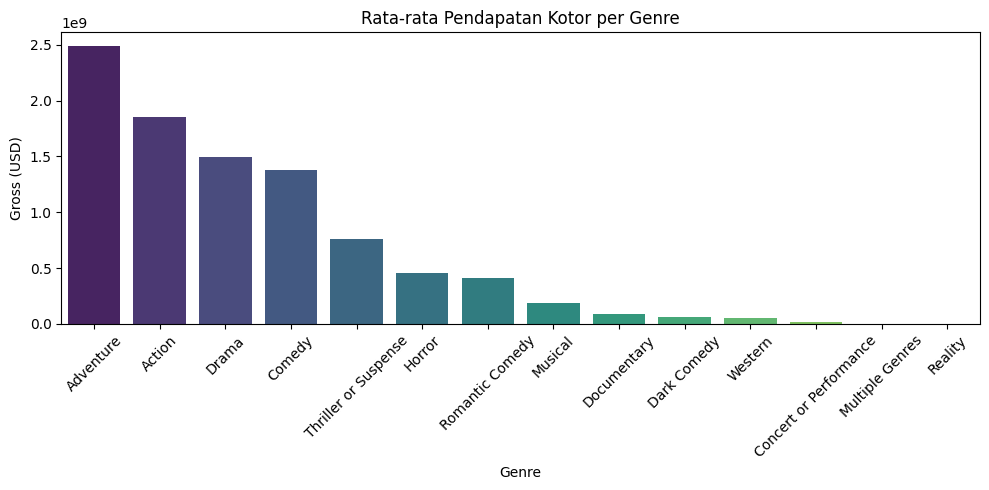

/tmp/ipython-input-32-181491921.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_summary.index, y=genre_summary['Tickets Sold'], palette='magma')


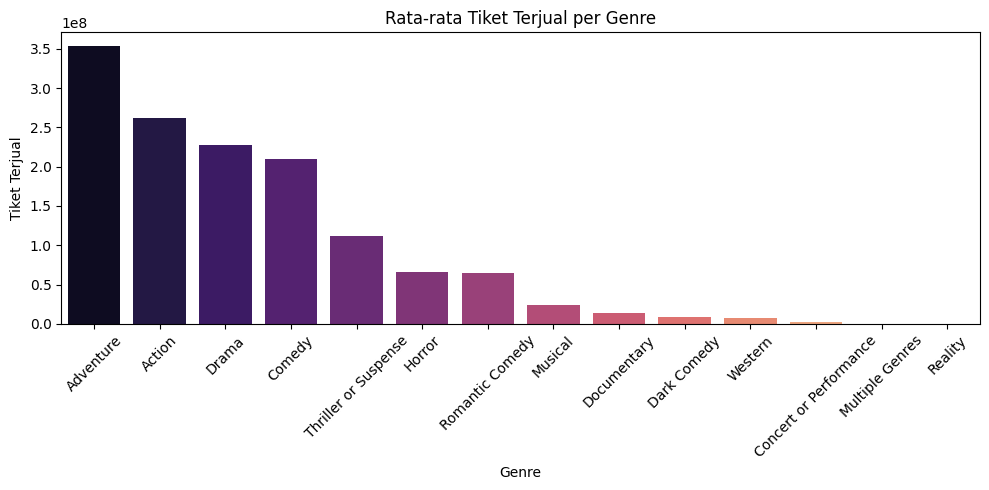

In [32]:
# Hitung rata-rata pendapatan dan tiket per genre
genre_summary = data.groupby('Genre')[['Gross', 'Tickets Sold']].mean().sort_values('Gross', ascending=False)

# Tampilkan hasil rata-rata
print(genre_summary)

# Visualisasi pendapatan rata-rata
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_summary.index, y=genre_summary['Gross'], palette='viridis')
plt.title('Rata-rata Pendapatan Kotor per Genre')
plt.ylabel('Gross (USD)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi tiket terjual rata-rata
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_summary.index, y=genre_summary['Tickets Sold'], palette='magma')
plt.title('Rata-rata Tiket Terjual per Genre')
plt.ylabel('Tiket Terjual')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

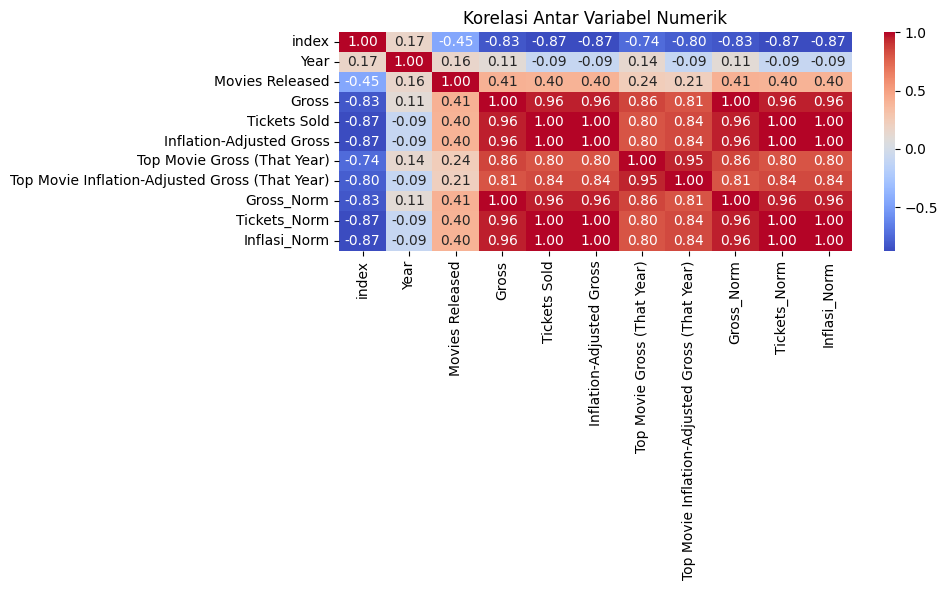

In [34]:
# Ambil kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation = numeric_cols.corr()

# Tampilkan heatmap korelasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.tight_layout()
plt.show()